In [173]:
import Pkg
Pkg.activate("packages/")
using Plots, CSV, DataFrames, StatsPlots, Plots.PlotMeasures
include("inference.jl")

  Activating environment at `~/Documents/Still evolving/Quantifying-SIM-exp/packages/Project.toml`


initial_mu_het (generic function with 2 methods)

# Elise Darmon, Edinburgh

In [174]:
mc_data = DataFrame(CSV.File("expdata/Darmon_2021_prelim/fluc_ana_data.csv"))

Row,Parameter,CFU_a_no,Rif_a_no,CFU_b_no,Rif_b_no,CFU_c_no,Rif_c_no,CFU_d_no,Rif_d_no,CFU_a_with,Rif_a_with,CFU_b_with,Rif_b_with,CFU_c_with,Rif_c_with,CFU_d_with,Rif_d_with
,String15,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,Dilution,100000.0,1.0,100000.0,1.0,100000.0,1.0,100000.0,1.0,1.0e6,1.0,1.0e6,1.0,1.0e6,1.0,1.0e6,1.0
2,Fraction,0.01,0.4,0.01,0.4,0.01,0.4,0.01,0.4,0.01,0.2,0.01,0.2,0.01,0.06,0.01,0.06
3,mc_1,747.0,4.0,612.0,55.0,436.0,35.0,589.0,355.0,18.0,8.0,13.0,28.0,30.0,26.0,20.0,138.0
4,mc_2,488.0,21.0,457.0,35.0,448.0,135.0,426.0,148.0,28.0,5.0,21.0,108.0,4.0,1.0,32.0,27.0
5,mc_3,589.0,4.0,426.0,6.0,812.0,102.0,549.0,164.0,31.0,3.0,15.0,474.0,6.0,150.0,43.0,252.0
6,mc_4,747.0,19.0,540.0,32.0,930.0,293.0,572.0,234.0,33.0,5.0,18.0,5.0,6.0,23.0,18.0,138.0
7,mc_5,638.0,12.0,1336.0,532.0,426.0,151.0,537.0,337.0,15.0,744.0,12.0,3.0,6.0,186.0,35.0,174.0
8,mc_6,697.0,77.0,615.0,113.0,343.0,73.0,571.0,663.0,24.0,1200.0,13.0,9.0,12.0,144.0,35.0,170.0
9,mc_7,657.0,86.0,425.0,13.0,626.0,598.0,526.0,561.0,8.0,17.0,31.0,15.0,10.0,34.0,46.0,31.0


In [175]:
Nf_p = mean(mc_data.CFU_a_no[3:end])*mc_data.CFU_a_no[1]/mc_data.CFU_a_no[2] / (mc_data.Rif_a_no[1]/mc_data.Rif_a_no[2])
mc_p = Int.(mc_data.Rif_a_no[3:end])
Nf_s = mean(mc_data.CFU_a_with[3:end])*mc_data.CFU_a_with[1]/mc_data.CFU_a_with[2] / (mc_data.Rif_a_with[1]/mc_data.Rif_a_with[2])
mc_s = Int.(mc_data.Rif_a_with[3:end]);

In [176]:
estimate_mu(mc_p, Nf_p, mc_s, Nf_s)

Homogeneous-response model is selected
(Mutant fitness set to 1 or the input value)
Mutation rate permissive condition = 1.9469301861874772e-9
Mutation rate stressful condition = 1.1507530313113472e-8
Increase in population mean mutation rate = 5.9106024421182655


Heterogenous response: mutation-rate increase = 97.94987472016238, fraction response-on = 0.053857702036860675
Homogeneous response: increase in population-average mutation rate = 5.9106024421182655


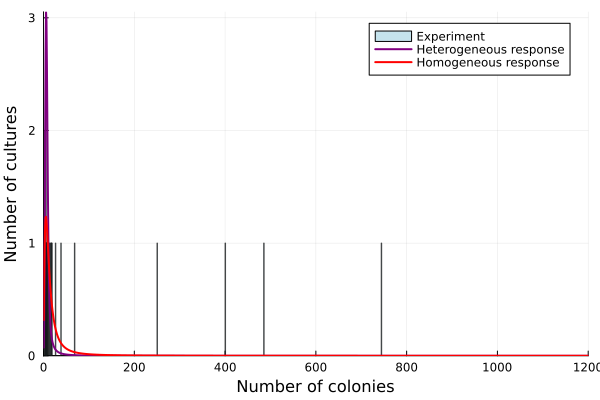

In [178]:
mu_off, mu_on, f_on, AIC = estimate_mu_het(mc_p, Nf_p, mc_s, Nf_s)
println("Heterogenous response: mutation-rate increase = ", mu_on/mu_off, ", fraction response-on = ", f_on)
mu_p, mu_s, AIC = estimate_mu_hom(mc_p, Nf_p, mc_s, Nf_s)
println("Homogeneous response: increase in population-average mutation rate = ", mu_s/mu_p)
p_het = P_mutant_count(maximum(mc_s), mu_off*Nf_s, mu_on*f_on/(mu_off*(1-f_on)), f_on)
p_hom = P_mutant_count(maximum(mc_s), mu_s*Nf_s)
histogram(mc_s, bins=0:maximum(mc_s), xlim=(0,maximum(mc_s)), lab="Experiment", c=:lightblue, alpha=0.7)
plot!(collect(0:maximum(mc_s)).+0.5, p_het*length(mc_s), width=2, c=:purple, lab="Heterogeneous response")
plot!(collect(0:maximum(mc_s)).+0.5, p_hom*length(mc_s), width=2, c=:red, lab="Homogeneous response")
plot!(xlab="Number of colonies", ylab="Number of cultures")

In [95]:
savefig("figures/Darmon_a.pdf")

"/Users/s2089131/Documents/Still evolving/Quantifying-SIM-exp/figures/Darmon_d.pdf"

# Rowan Green, Krasovec Group, Manchester

In [179]:
mc_data = DataFrame(CSV.File("expdata/Green_2022_prelim/Fluctuation_results_22.txt"))
subset!(mc_data, :coculture_strain => ByRow(x->x=="none"))
dropmissing!(mc_data, :coculture_strain)
dropmissing!(mc_data, :date)
dropmissing!(mc_data, :Nt_genotype)

Row,assay_ID,calib,block,date,plate_ID,stock_number,External_Treatment,genotype,Selective_marker,stock,coculture_strain,coculture_ID,Media,LB_perc,GlcMedia,Mut_to_WT_ratio,glucose,N0_ul,N0_CFU,N0,N0_coculture,N0_gen_to_co_ratio,LUM_gross1,LUM_gross2,LUM_gross3,LUM_background1,LUM_background2,LUM_background3,Nt1_CFU,Nt2_CFU,Nt3_CFU,Nt1,Nt2,Nt3,environment,CI_range_coculture_strain,CI_range_genotype,fluctuation_volume_t0,culture_volume_final,coculture,culture_volume_initial,D_coculture_strain,D_genotype,D_total,generation_time,generations,generations_coculture_strain,genotype2,incubation_mins,LUM,LUM_background,LUM_CV,LUM_per_cell,LUM_SD,LUM1,LUM2,LUM3,m_coculture_strain,m_genotype,m_lower_genotype,m_upper_genotype,m_lower_coculture_strain,m_upper_coculture_strain,mut_fitness_genotype,mutation_rate_coculture_strain,mutation_rate_genotype,mutation_rate_genotype_lower,mutation_rate_genotype_upper,Mutations_per_generation,N_cultures,Nt_genotype,Nt_coculture_strain,Nt_CV,Nt_dilution,Nt_N0_ratio,Nt_SD,Nt_total,sd_m_coculture_strain,sd_m_genotype,Sel_CFU1,Sel_CFU10,Sel_CFU11,Sel_CFU12,Sel_CFU13,Sel_CFU14,Sel_CFU15,Sel_CFU16,Sel_CFU17,Sel_CFU18,Sel_CFU2,Sel_CFU3,Sel_CFU4,Sel_CFU5,Sel_CFU6,Sel_CFU7,Sel_CFU8,Sel_CFU9,strain,Treatment,Weight0,⋯
,String,String1,String7,String15,String7,Int64,String7,String15,String3,String15,String15,String15,String3,Float64?,String1,Int64?,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64?,Float64?,Float64?,Float64?,Float64,Float64?,Float64?,Int64,Float64,String1,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String31,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64,Float64,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Float64,Float64?,Float64?,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,String15,String31,Float64,⋯
1,RG1_180ancestor70322265.625,y,RG1,9/11/20,RG1_1,1,Control,ancestor,rif,ancestor1,none,ancestor,DM,missing,y,missing,80,10.0,91.0,9100.0,missing,missing,missing,missing,missing,missing,missing,missing,24,33,missing,5.92188e7,8.14258e7,missing,80.0,missing,44.0144,1000,986.979,n,1000,0.0,7.125e7,7.125e7,113.814,12.9158,missing,ancestor_none,1470,missing,missing,missing,missing,missing,missing,missing,missing,missing,3.86871,2.32111,5.4163,missing,missing,2.19023,missing,55.014,33.0068,77.0212,0.299532,17,7.03223e7,0.0,missing,100000,7727.72,missing,7.03223e7,missing,0.454983,7,6,8,5,4,4,4,6,11,missing,2,6,0,24,18,4,7,4,keio,ancestor_none+Controly,211.54,⋯
2,RG1_1100ancestor225360243.055556,y,RG1,9/11/20,RG1_1,1,Control,ancestor,rif,ancestor1,none,ancestor,DM,missing,y,missing,100,10.0,101.0,10100.0,missing,missing,missing,missing,missing,missing,missing,missing,35,42,197,8.63607e7,1.03633e8,4.86087e8,100.0,missing,17.4824,1000,986.979,n,1000,0.0,2.28333e8,2.28333e8,101.761,14.4456,missing,ancestor_none,1470,missing,missing,missing,missing,missing,missing,missing,missing,missing,4.05307,2.08315,6.02298,missing,missing,3.88932,missing,17.9848,9.24364,26.726,0.280575,16,2.2536e8,0.0,0.818674,100000,22312.9,1.84497e8,2.2536e8,missing,0.475913,11,4,5,11,7,1,2,5,missing,missing,3,6,6,2,4,12,3,5,keio,ancestor_none+Controly,211.54,⋯
3,RG1_1250ancestor410418836.805556,y,RG1,9/11/20,RG1_1,1,Control,ancestor,rif,ancestor1,none,ancestor,DM,missing,y,missing,250,10.0,215.0,21500.0,missing,missing,missing,missing,missing,missing,missing,missing,191,150,158,4.71283e8,3.70117e8,3.89857e8,250.0,missing,9.66739,1000,986.979,n,1000,0.0,4.15833e8,4.15833e8,103.372,14.2205,missing,ancestor_none,1470,missing,missing,missing,missing,missing,missing,missing,missing,missing,6.25324,4.2694,8.23707,missing,missing,4.44099,missing,15.2362,10.4025,20.0699,0.439735,16,4.10419e8,0.0,0.106684,100000,19089.2,4.37851e7,4.10419

In [65]:
print(names(mc_data))

["assay_ID", "calib", "block", "date", "plate_ID", "stock_number", "External_Treatment", "genotype", "Selective_marker", "stock", "coculture_strain", "coculture_ID", "Media", "LB_perc", "GlcMedia", "Mut_to_WT_ratio", "glucose", "N0_ul", "N0_CFU", "N0", "N0_coculture", "N0_gen_to_co_ratio", "LUM_gross1", "LUM_gross2", "LUM_gross3", "LUM_background1", "LUM_background2", "LUM_background3", "Nt1_CFU", "Nt2_CFU", "Nt3_CFU", "Nt1", "Nt2", "Nt3", "environment", "CI_range_coculture_strain", "CI_range_genotype", "fluctuation_volume_t0", "culture_volume_final", "coculture", "culture_volume_initial", "D_coculture_strain", "D_genotype", "D_total", "generation_time", "generations", "generations_coculture_strain", "genotype2", "incubation_mins", "LUM", "LUM_background", "LUM_CV", "LUM_per_cell", "LUM_SD", "LUM1", "LUM2", "LUM3", "m_coculture_strain", "m_genotype", "m_lower_genotype", "m_upper_genotype", "m_lower_coculture_strain", "m_upper_coculture_strain", "mut_fitness_genotype", "mutation_rate_co

In [180]:
envs = unique(mc_data.environment)
env = envs[2]
gtypes = unique(mc_data.genotype)
gtype = gtypes[1]

"ancestor"

In [181]:
mc_data_p = subset(mc_data, :External_Treatment => ByRow(x->x=="Control"))
mc_data_p = subset(mc_data_p, :environment => ByRow(x->x==env))
mc_data_p = subset(mc_data_p, :genotype => ByRow(x->x==gtype))
mc_data_s = subset(mc_data, :External_Treatment => ByRow(x->x!="Control"))
mc_data_s = subset(mc_data_s, :environment => ByRow(x->x==env))
mc_data_s = subset(mc_data_s, :genotype => ByRow(x->x==gtype))

Row,assay_ID,calib,block,date,plate_ID,stock_number,External_Treatment,genotype,Selective_marker,stock,coculture_strain,coculture_ID,Media,LB_perc,GlcMedia,Mut_to_WT_ratio,glucose,N0_ul,N0_CFU,N0,N0_coculture,N0_gen_to_co_ratio,LUM_gross1,LUM_gross2,LUM_gross3,LUM_background1,LUM_background2,LUM_background3,Nt1_CFU,Nt2_CFU,Nt3_CFU,Nt1,Nt2,Nt3,environment,CI_range_coculture_strain,CI_range_genotype,fluctuation_volume_t0,culture_volume_final,coculture,culture_volume_initial,D_coculture_strain,D_genotype,D_total,generation_time,generations,generations_coculture_strain,genotype2,incubation_mins,LUM,LUM_background,LUM_CV,LUM_per_cell,LUM_SD,LUM1,LUM2,LUM3,m_coculture_strain,m_genotype,m_lower_genotype,m_upper_genotype,m_lower_coculture_strain,m_upper_coculture_strain,mut_fitness_genotype,mutation_rate_coculture_strain,mutation_rate_genotype,mutation_rate_genotype_lower,mutation_rate_genotype_upper,Mutations_per_generation,N_cultures,Nt_genotype,Nt_coculture_strain,Nt_CV,Nt_dilution,Nt_N0_ratio,Nt_SD,Nt_total,sd_m_coculture_strain,sd_m_genotype,Sel_CFU1,Sel_CFU10,Sel_CFU11,Sel_CFU12,Sel_CFU13,Sel_CFU14,Sel_CFU15,Sel_CFU16,Sel_CFU17,Sel_CFU18,Sel_CFU2,Sel_CFU3,Sel_CFU4,Sel_CFU5,Sel_CFU6,Sel_CFU7,Sel_CFU8,Sel_CFU9,strain,Treatment,Weight0,⋯
,String,String1,String7,String15,String7,Int64,String7,String15,String3,String15,String15,String15,String3,Float64?,String1,Int64?,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64?,Float64?,Float64?,Float64?,Float64,Float64?,Float64?,Int64,Float64,String1,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String31,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64,Float64,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Float64,Float64?,Float64?,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,String15,String31,Float64,⋯
1,RG16_1100ancestor182102343.75,y,RG16,21/10/2021,RG16_1,1,Kat70,ancestor,rif,ancestor1,none,ancestor,DM,missing,y,missing,100,10.0,43.0,4300.0,missing,missing,2.11493e6,2.10273e6,1.96534e6,155790.0,235607.0,232279.0,79,80,84,1.77606e8,1.79854e8,1.88847e8,100.0,missing,26.3586,1000,899.271,n,1000,0.0,2.025e8,2.025e8,93.6887,15.3701,missing,ancestor_none,1440,1.85311e6,207892.0,0.0500925,0.0915115,92826.9,1.95914e6,1.86712e6,1.73306e6,missing,5.18611,2.78613,7.58609,missing,missing,3.94529,missing,28.4791,15.2998,41.6584,0.337416,16,1.82102e8,0.0,0.0266697,100000,42349.4,4.85662e6,1.82102e8,missing,0.514341,6,7,3,11,5,5,13,2,5,3,9,9,7,5,5,16,missing,missing,keio,ancestor_none+Kat70y,220.8,⋯
2,RG16_2100ancestor158319010.416667,y,RG16,21/10/2021,RG16_2,1,Kat70,ancestor,rif,ancestor1,none,ancestor,DM,missing,y,missing,100,10.0,41.0,4100.0,missing,missing,2.41424e6,2.45844e6,2.51536e6,238778.0,247467.0,248593.0,59,57,83,1.40816e8,1.36043e8,1.98098e8,100.0,missing,43.879,1000,954.688,n,1000,0.0,1.65833e8,1.65833e8,94.5077,15.2369,missing,ancestor_none,1440,2.21773e6,244946.0,0.0169454,0.133733,37580.4,2.17546e6,2.21097e6,2.26677e6,missing,5.59428,2.12084,9.06772,missing,missing,4.31639,missing,35.3355,13.396,57.275,0.367155,16,1.58319e8,0.0,0.178091,100000,38614.4,2.81952e7,1.58319e8,missing,0.526763,4,5,5,6,5,7,6,9,19,5,8,14,6,6,4,8,missing,missing,keio,ancestor_none+Kat70y,220.72,⋯
3,RG16_3100ancestor166554166.666667,y,RG16,21/10/2021,RG16_3,1,H10,ancestor,rif,ancestor1,none,ancestor,DM,missing,y,missing,100,10.0,36.0,3600.0,missing,missing,1.72977e6,1.75517e6,1.56421e6,212467.0,185542.0,148264.0,64,82,67,1.50133e8,1.92358e8,1.57171e8,100.0,missing,31.1901,1000,938.333,n,1000,0.0,1.775e8,1.775e8,92.9174,15.4976,missing,ancestor_none,1440,1.50096e6,182091.0,0.0425035,0.0845611,63795.9,1.5173e6,1.56963e6,1.41595e6,missing,4.76399,2.16658,7.36141,missing,missing,2.04995,missing,28.6033,13.0082,44.198

In [182]:
dates = unique(mc_data_p.date)
date = dates[6]
mc_data_p1 = subset(mc_data_p, :date => ByRow(x->x==date))
mc_data_s1 = subset(mc_data_s, :date => ByRow(x->x==date))

Row,assay_ID,calib,block,date,plate_ID,stock_number,External_Treatment,genotype,Selective_marker,stock,coculture_strain,coculture_ID,Media,LB_perc,GlcMedia,Mut_to_WT_ratio,glucose,N0_ul,N0_CFU,N0,N0_coculture,N0_gen_to_co_ratio,LUM_gross1,LUM_gross2,LUM_gross3,LUM_background1,LUM_background2,LUM_background3,Nt1_CFU,Nt2_CFU,Nt3_CFU,Nt1,Nt2,Nt3,environment,CI_range_coculture_strain,CI_range_genotype,fluctuation_volume_t0,culture_volume_final,coculture,culture_volume_initial,D_coculture_strain,D_genotype,D_total,generation_time,generations,generations_coculture_strain,genotype2,incubation_mins,LUM,LUM_background,LUM_CV,LUM_per_cell,LUM_SD,LUM1,LUM2,LUM3,m_coculture_strain,m_genotype,m_lower_genotype,m_upper_genotype,m_lower_coculture_strain,m_upper_coculture_strain,mut_fitness_genotype,mutation_rate_coculture_strain,mutation_rate_genotype,mutation_rate_genotype_lower,mutation_rate_genotype_upper,Mutations_per_generation,N_cultures,Nt_genotype,Nt_coculture_strain,Nt_CV,Nt_dilution,Nt_N0_ratio,Nt_SD,Nt_total,sd_m_coculture_strain,sd_m_genotype,Sel_CFU1,Sel_CFU10,Sel_CFU11,Sel_CFU12,Sel_CFU13,Sel_CFU14,Sel_CFU15,Sel_CFU16,Sel_CFU17,Sel_CFU18,Sel_CFU2,Sel_CFU3,Sel_CFU4,Sel_CFU5,Sel_CFU6,Sel_CFU7,Sel_CFU8,Sel_CFU9,strain,Treatment,Weight0,⋯
,String,String1,String7,String15,String7,Int64,String7,String15,String3,String15,String15,String15,String3,Float64?,String1,Int64?,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64?,Float64?,Float64?,Float64?,Float64,Float64?,Float64?,Int64,Float64,String1,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String31,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64,Float64,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Float64,Float64?,Float64?,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,String15,String31,Float64,⋯
1,RG16_1100ancestor182102343.75,y,RG16,21/10/2021,RG16_1,1,Kat70,ancestor,rif,ancestor1,none,ancestor,DM,missing,y,missing,100,10.0,43.0,4300.0,missing,missing,2.11493e6,2.10273e6,1.96534e6,155790.0,235607.0,232279.0,79,80,84,1.77606e8,1.79854e8,1.88847e8,100.0,missing,26.3586,1000,899.271,n,1000,0.0,2.025e8,2.025e8,93.6887,15.3701,missing,ancestor_none,1440,1.85311e6,207892.0,0.0500925,0.0915115,92826.9,1.95914e6,1.86712e6,1.73306e6,missing,5.18611,2.78613,7.58609,missing,missing,3.94529,missing,28.4791,15.2998,41.6584,0.337416,16,1.82102e8,0.0,0.0266697,100000,42349.4,4.85662e6,1.82102e8,missing,0.514341,6,7,3,11,5,5,13,2,5,3,9,9,7,5,5,16,missing,missing,keio,ancestor_none+Kat70y,220.8,⋯
2,RG16_2100ancestor158319010.416667,y,RG16,21/10/2021,RG16_2,1,Kat70,ancestor,rif,ancestor1,none,ancestor,DM,missing,y,missing,100,10.0,41.0,4100.0,missing,missing,2.41424e6,2.45844e6,2.51536e6,238778.0,247467.0,248593.0,59,57,83,1.40816e8,1.36043e8,1.98098e8,100.0,missing,43.879,1000,954.688,n,1000,0.0,1.65833e8,1.65833e8,94.5077,15.2369,missing,ancestor_none,1440,2.21773e6,244946.0,0.0169454,0.133733,37580.4,2.17546e6,2.21097e6,2.26677e6,missing,5.59428,2.12084,9.06772,missing,missing,4.31639,missing,35.3355,13.396,57.275,0.367155,16,1.58319e8,0.0,0.178091,100000,38614.4,2.81952e7,1.58319e8,missing,0.526763,4,5,5,6,5,7,6,9,19,5,8,14,6,6,4,8,missing,missing,keio,ancestor_none+Kat70y,220.72,⋯
3,RG16_3100ancestor166554166.666667,y,RG16,21/10/2021,RG16_3,1,H10,ancestor,rif,ancestor1,none,ancestor,DM,missing,y,missing,100,10.0,36.0,3600.0,missing,missing,1.72977e6,1.75517e6,1.56421e6,212467.0,185542.0,148264.0,64,82,67,1.50133e8,1.92358e8,1.57171e8,100.0,missing,31.1901,1000,938.333,n,1000,0.0,1.775e8,1.775e8,92.9174,15.4976,missing,ancestor_none,1440,1.50096e6,182091.0,0.0425035,0.0845611,63795.9,1.5173e6,1.56963e6,1.41595e6,missing,4.76399,2.16658,7.36141,missing,missing,2.04995,missing,28.6033,13.0082,44.198

In [183]:
treatms = unique(mc_data_s1.External_Treatment)
treatm = treatms[1]
mc_data_s2 = subset(mc_data_s1, :External_Treatment => ByRow(x->x==treatm))

Row,assay_ID,calib,block,date,plate_ID,stock_number,External_Treatment,genotype,Selective_marker,stock,coculture_strain,coculture_ID,Media,LB_perc,GlcMedia,Mut_to_WT_ratio,glucose,N0_ul,N0_CFU,N0,N0_coculture,N0_gen_to_co_ratio,LUM_gross1,LUM_gross2,LUM_gross3,LUM_background1,LUM_background2,LUM_background3,Nt1_CFU,Nt2_CFU,Nt3_CFU,Nt1,Nt2,Nt3,environment,CI_range_coculture_strain,CI_range_genotype,fluctuation_volume_t0,culture_volume_final,coculture,culture_volume_initial,D_coculture_strain,D_genotype,D_total,generation_time,generations,generations_coculture_strain,genotype2,incubation_mins,LUM,LUM_background,LUM_CV,LUM_per_cell,LUM_SD,LUM1,LUM2,LUM3,m_coculture_strain,m_genotype,m_lower_genotype,m_upper_genotype,m_lower_coculture_strain,m_upper_coculture_strain,mut_fitness_genotype,mutation_rate_coculture_strain,mutation_rate_genotype,mutation_rate_genotype_lower,mutation_rate_genotype_upper,Mutations_per_generation,N_cultures,Nt_genotype,Nt_coculture_strain,Nt_CV,Nt_dilution,Nt_N0_ratio,Nt_SD,Nt_total,sd_m_coculture_strain,sd_m_genotype,Sel_CFU1,Sel_CFU10,Sel_CFU11,Sel_CFU12,Sel_CFU13,Sel_CFU14,Sel_CFU15,Sel_CFU16,Sel_CFU17,Sel_CFU18,Sel_CFU2,Sel_CFU3,Sel_CFU4,Sel_CFU5,Sel_CFU6,Sel_CFU7,Sel_CFU8,Sel_CFU9,strain,Treatment,Weight0,⋯
,String,String1,String7,String15,String7,Int64,String7,String15,String3,String15,String15,String15,String3,Float64?,String1,Int64?,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64?,Float64?,Float64?,Float64?,Float64,Float64?,Float64?,Int64,Float64,String1,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String31,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64,Float64,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Float64,Float64?,Float64?,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,String15,String31,Float64,⋯
1,RG16_1100ancestor182102343.75,y,RG16,21/10/2021,RG16_1,1,Kat70,ancestor,rif,ancestor1,none,ancestor,DM,missing,y,missing,100,10.0,43.0,4300.0,missing,missing,2.11493e6,2.10273e6,1.96534e6,155790.0,235607.0,232279.0,79,80,84,1.77606e8,1.79854e8,1.88847e8,100.0,missing,26.3586,1000,899.271,n,1000,0.0,2.025e8,2.025e8,93.6887,15.3701,missing,ancestor_none,1440,1.85311e6,207892.0,0.0500925,0.0915115,92826.9,1.95914e6,1.86712e6,1.73306e6,missing,5.18611,2.78613,7.58609,missing,missing,3.94529,missing,28.4791,15.2998,41.6584,0.337416,16,1.82102e8,0.0,0.0266697,100000,42349.4,4.85662e6,1.82102e8,missing,0.514341,6,7,3,11,5,5,13,2,5,3,9,9,7,5,5,16,missing,missing,keio,ancestor_none+Kat70y,220.8,⋯
2,RG16_2100ancestor158319010.416667,y,RG16,21/10/2021,RG16_2,1,Kat70,ancestor,rif,ancestor1,none,ancestor,DM,missing,y,missing,100,10.0,41.0,4100.0,missing,missing,2.41424e6,2.45844e6,2.51536e6,238778.0,247467.0,248593.0,59,57,83,1.40816e8,1.36043e8,1.98098e8,100.0,missing,43.879,1000,954.688,n,1000,0.0,1.65833e8,1.65833e8,94.5077,15.2369,missing,ancestor_none,1440,2.21773e6,244946.0,0.0169454,0.133733,37580.4,2.17546e6,2.21097e6,2.26677e6,missing,5.59428,2.12084,9.06772,missing,missing,4.31639,missing,35.3355,13.396,57.275,0.367155,16,1.58319e8,0.0,0.178091,100000,38614.4,2.81952e7,1.58319e8,missing,0.526763,4,5,5,6,5,7,6,9,19,5,8,14,6,6,4,8,missing,missing,keio,ancestor_none+Kat70y,220.72,⋯


In [184]:
mc_p = Vector{Int64}(undef, 0)
Nf_p = 0.
for r = 1:size(mc_data_p1)[1]
    Nf_p += mc_data_p1.Nt_genotype[r]
    for n = 1:18
        s = "Sel_CFU$n"
        j = findfirst(x->x==s, names(mc_data_p1))
        try
            push!(mc_p, mc_data_p1[r,j])
        catch e
        end
    end
end
Nf_p /= size(mc_data_p1)[1]
println(mc_p)
println(Nf_p)
mc_s = Vector{Int64}(undef, 0)
Nf_s = 0.
for r = 1:size(mc_data_s2)[1]
    Nf_s += mc_data_s2.Nt_genotype[r]
    for n = 1:18
        s = "Sel_CFU$n"
        j = findfirst(x->x==s, names(mc_data_s2))
        try
            push!(mc_s, mc_data_s2[r,j])
        catch e
        end
    end
end
Nf_s /= size(mc_data_s2)[1]
println(mc_s)
println(Nf_s)

[12, 10, 6, 10, 3, 12, 7, 8, 2, 7, 2, 7, 4, 6, 8, 23, 15, 41, 4, 33, 5, 2, 6, 6, 8, 7, 17, 12, 5, 6, 9, 15, 7, 11, 3, 5, 9, 9, 4, 4, 1, 7, 7, 12, 7, 7, 5, 4, 2, 4, 7]
1.47917476851852e8
[6, 9, 9, 7, 5, 5, 16, 7, 3, 11, 5, 5, 13, 2, 5, 3, 4, 8, 14, 6, 6, 4, 8, 5, 5, 6, 5, 7, 6, 9, 19, 5]
1.702106770833335e8


In [185]:
estimate_mu(mc_p, Nf_p, mc_s, Nf_s)

Homogeneous-response model is selected
(Mutant fitness inferred, constrained to be equal under permissive and stressful conditions)
Mutation rate permissive condition = 3.326273596275441e-8
Mutation rate stressful condition = 2.8063945796332945e-8
Mutant fitness = 0.3747401695335364
Increase in population mean mutation rate = 0.8437052751089761


In [186]:
println(mc_data_p1.m_genotype ./ Nf_p)
println(1 ./ mc_data_p1.mut_fitness_genotype)
println(mc_data_s1.m_genotype ./ Nf_s)
println(1 ./ mc_data_s1.mut_fitness_genotype)

[3.549991805403253e-8, 3.35665380634691e-8, 3.417314435442056e-8]
[0.3764285944635815, 0.5710784119264892, 0.11422575885585053]
[3.046876351041675e-8, 3.2866793892495326e-8, 2.798879612979623e-8]
[0.2534664765394011, 0.23167514297014213, 0.48781661348874505]


# Vasse et al. (2022): Ecological effects of stress drive bacterial evolvability under sub-inhibitory antbiotic treatments

In [17]:
list_studies = ["Baharoglu", "Cortes", "Dapa", "Frenoy", "Giroux", "Hocquet", "Jara", "Mo", "RodriguezRojas", "TorresBarcelo", "Vasse"]
list_permissive = ["LB", "BHI", "MH", "M9KB", "NT"]
list_stress = ["Amp", "Cip", "Cm", "Col", "Ery", "Genta", "Kan", "Mer", "Met", "MMC", "Nal", "Neo", "Nitro", "Nor", "Novo", "Pen", "Rif", "Spec", "Strep", "Tet", "Tob", "Trim"]
list_cond = ["", "ami", "cef", "cipro", "imi", "opto", "rif", "24h", "48h", "lexA", "a", "b"];

In [5]:
length(list_stress)

22

In [214]:
exp_permissive = "Frenoy_LB"
exp_stress = "Frenoy_Nor"
df_permissive = DataFrame(CSV.File("expdata/Vasse_etal_2022/$exp_permissive.txt"))
df_stress = DataFrame(CSV.File("expdata/Vasse_etal_2022/$exp_stress.txt"))

┌ Warning: thread = 1 warning: parsed expected 1 columns, but didn't reach end of line around data row: 2. Parsing extra columns and widening final columnset
└ @ CSV /Users/s2089131/.julia/packages/CSV/mgO6B/src/file.jl:580
┌ Warning: thread = 1 warning: only found 6 / 153 columns around data row: 3. Filling remaining columns with `missing`
└ @ CSV /Users/s2089131/.julia/packages/CSV/mgO6B/src/file.jl:579
┌ Warning: thread = 1 warning: parsed expected 1 columns, but didn't reach end of line around data row: 2. Parsing extra columns and widening final columnset
└ @ CSV /Users/s2089131/.julia/packages/CSV/mgO6B/src/file.jl:580
┌ Warning: thread = 1 warning: only found 6 / 134 columns around data row: 3. Filling remaining columns with `missing`
└ @ CSV /Users/s2089131/.julia/packages/CSV/mgO6B/src/file.jl:579


Row,Norfloxacin 0.05ug/mL,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,Column42,Column43,Column44,Column45,Column46,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57,Column58,Column59,Column60,Column61,Column62,Column63,Column64,Column65,Column66,Column67,Column68,Column69,Column70,Column71,Column72,Column73,Column74,Column75,Column76,Column77,Column78,Column79,Column80,Column81,Column82,Column83,Column84,Column85,Column86,Column87,Column88,Column89,Column90,Column91,Column92,Column93,Column94,Column95,Column96,Column97,Column98,Column99,Column100,⋯
,String15,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,⋯
1,0.2@1,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,⋯
2,1,0.0,0.0,2.0,1.0,2.0,2,0,2,1,0,3,0,0,2,6,0,1,0,2,2,2,1,0,1,1,1,2,2,4,3,3,0,1,1,1,2,6,7,3,7,1,6,4,4,1,2,4,3,10,4,2,4,4,1,4,0,0,1,1,15,2,6,13,6,5,2,1,0,5,4,1,2,6,2,0,3,2,2,0,16,1,1,1,3,8,6,7,0,0,0,4,1,1,0,7,7,1,2,2,⋯
3,7.97E+07,7.08e7,1.0e8,1.43e8,4.07e7,2.97e7,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,⋯


In [215]:
v1 = Vector(df_permissive[2,:])
mc_p = Vector{Int}(undef, 0)
for i = 1:length(v1)
    if typeof(v1[i]) == Int
        push!(mc_p, v1[i])
    elseif typeof(v1[i]) <: AbstractString
        try
            push!(mc_p, parse(Int, v1[i]))
        catch e
        end
    elseif typeof(v1[i]) <: AbstractFloat
        push!(mc_p, convert(Int, v1[i]))
    end
end
v2 = Vector(df_permissive[3,:])
Nfs_p = Vector{Int}(undef, 0)
for i = 1:length(v2)
    if typeof(v2[i]) == Float64
        push!(Nfs_p, v2[i])
    elseif typeof(v2[i]) <: AbstractString
        push!(Nfs_p, parse(Float64, v2[i]))
    end
end
Nf_p = mean(Nfs_p)
v1 = Vector(df_stress[2,:])
mc_s = Vector{Int}(undef, 0)
for i = 1:length(v1)
    if typeof(v1[i]) == Int
        push!(mc_s, v1[i])
    elseif typeof(v1[i]) <: AbstractString
        try
            push!(mc_s, parse(Int, v1[i]))
        catch e
        end
    elseif typeof(v1[i]) <: AbstractFloat
        push!(mc_s, convert(Int, v1[i]))
    end
end
v2 = Vector(df_stress[3,:])
Nfs_s = Vector{Int}(undef, 0)
for i = 1:length(v2)
    if typeof(v2[i]) == Float64
        push!(Nfs_s, v2[i])
    elseif typeof(v2[i]) <: AbstractString
        try
            push!(Nfs_s, parse(Float64, v2[i]))
        catch e
        end
    end
end
Nf_s = mean(Nfs_s)

7.731666666666667e7

In [216]:
estimate_mu(mc_p, Nf_p, mc_s, Nf_s, joint=true)

Heterogeneous-response model with non-dividing response-on cells is selected
Mutation rate response-off cells = 2.7162474219990975e-9
Mutation rate response-on cells = 8.972300292212965e-8
Fraction response-on subpopulation = 0.19903529248931143
Relative mutation-rate increase = 33.0319698402495
Increase in population mean mutation rate = 7.375492486162862


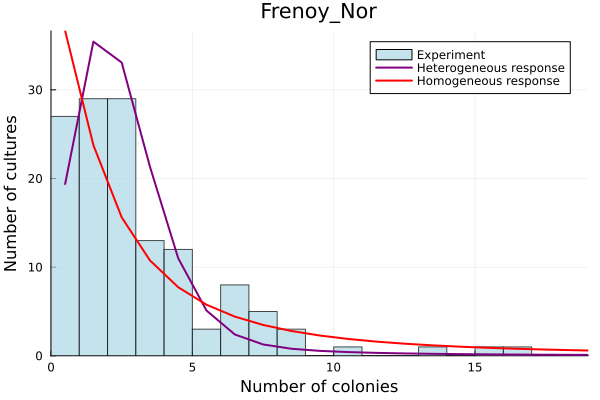

In [217]:
mu_off, mu_on, f_on, AIC = estimate_mu_het(mc_p, Nf_p, mc_s, Nf_s)
mu_p, mu_s, AIC = estimate_mu_hom(mc_p, Nf_p, mc_s, Nf_s)
p_het = P_mutant_count(maximum(mc_s), mu_off*Nf_s, mu_on*f_on/(mu_off*(1-f_on)), f_on)
p_hom = P_mutant_count(maximum(mc_s), mu_s*Nf_s)
histogram(mc_s, bins=0:maximum(mc_s), xlim=(0,maximum(mc_s)), lab="Experiment", c=:lightblue, alpha=0.7)
plot!(collect(0:maximum(mc_s)).+0.5, p_het*length(mc_s), width=2, c=:purple, lab="Heterogeneous response")
plot!(collect(0:maximum(mc_s)).+0.5, p_hom*length(mc_s), width=2, c=:red, lab="Homogeneous response")
plot!(xlab="Number of colonies", ylab="Number of cultures", title="$exp_stress")

In [6]:
savefig("figures/$exp_stress.pdf")

"/Users/s2089131/Library/CloudStorage/OneDrive-UniversityofEdinburgh/SBS/3rd year review meeting/Data analysis/figures/Frenoy_Kan.pdf"